In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('Labelled_Data.csv')
# adf=pd.read_csv('AttributeCodes.csv')
df

,Unnamed: 0,Data,Label
0,1,$candidates.candidateId,NaN
1,2,$candidates.workspace,JP
2,3,$candidates.teaId,NaN
3,4,$candidates.title,NaN
4,5,$candidates.firstName,FINA
...,...,...,...
18387,18388,$paymentMethods.check.zip,PC
18388,18389,$paymentMethods.check.countryId,CC
18389,18390,$hp,NaN
18390,18391,$subDistrict,CITY


In [ ]:
#Check for null values in the dataset
df.isnull().sum()

Unnamed: 0        0
Data              2
Label         15745
dtype: int64

In [ ]:
#Removing the null values
df=df.dropna(subset=["Data"])

In [ ]:
#Splitting the word with the upper case
newCol=[]
for i in df["Data"]:
    temp=i
    n=len(temp)
    j=0
    while j<n:
        if ord(temp[j])<=90 and ord(temp[j])>=65:
            temp=temp[:j]+" "+temp[j:]
            n+=1
            j+=1
        j+=1
    newCol.append(temp)

In [ ]:
#Camel case separated dataframe can be given as
df["Separated"]=newCol

In [ ]:
df

,Unnamed: 0,Data,Label,Separated
0,1,$candidates.candidateId,NaN,$candidates.candidate Id
1,2,$candidates.workspace,JP,$candidates.workspace
2,3,$candidates.teaId,NaN,$candidates.tea Id
3,4,$candidates.title,NaN,$candidates.title
4,5,$candidates.firstName,FINA,$candidates.first Name
...,...,...,...,...
18387,18388,$paymentMethods.check.zip,PC,$payment Methods.check.zip
18388,18389,$paymentMethods.check.countryId,CC,$payment Methods.check.country Id
18389,18390,$hp,NaN,$hp
18390,18391,$subDistrict,CITY,$sub District


In [ ]:
###Text Preprocessing

#Convert the data type of the column to string
df["Separated"]=df["Separated"].astype('string')

#Replace $ with blank
df["Separated"]=df["Separated"].str.replace("$","")

#Replace the space with .
df["Separated"]=df["Separated"].str.replace(" ",".")

#Convert the whole text into lower case
df['Separated']=df['Separated'].str.lower()

#Split the data into different words
df["Text_Split"]= df["Separated"].str.split(".")

#Label the classes to 0 and 1

df['Label'] = df['Label'].fillna(0)
df.loc[df['Label'] != 0, 'Label'] = 1

In [ ]:
df

,Unnamed: 0,Data,Label,Separated,Text_Split
0,1,$candidates.candidateId,0,candidates.candidate.id,"[candidates, candidate, id]"
1,2,$candidates.workspace,1,candidates.workspace,"[candidates, workspace]"
2,3,$candidates.teaId,0,candidates.tea.id,"[candidates, tea, id]"
3,4,$candidates.title,0,candidates.title,"[candidates, title]"
4,5,$candidates.firstName,1,candidates.first.name,"[candidates, first, name]"
...,...,...,...,...,...
18387,18388,$paymentMethods.check.zip,1,payment.methods.check.zip,"[payment, methods, check, zip]"
18388,18389,$paymentMethods.check.countryId,1,payment.methods.check.country.id,"[payment, methods, check, country, id]"
18389,18390,$hp,0,hp,[hp]
18390,18391,$subDistrict,1,sub.district,"[sub, district]"


In [ ]:
#Converting the column "Text_Split" to string type column

df['Text_Split']=df['Text_Split'].astype('string')

In [ ]:
#Further preprocessing to remove the punctuations and symbols from the whole column

df.iloc[:,4]=df.iloc[:,4].str.replace("[","")
df.iloc[:,4]=df.iloc[:,4].str.replace("]","")
df.iloc[:,4]=df.iloc[:,4].str.replace(",","")
df.iloc[:,4]=df.iloc[:,4].str.replace("'","")

In [ ]:
df

,Unnamed: 0,Data,Label,Separated,Text_Split
0,1,$candidates.candidateId,0,candidates.candidate.id,candidates candidate id
1,2,$candidates.workspace,1,candidates.workspace,candidates workspace
2,3,$candidates.teaId,0,candidates.tea.id,candidates tea id
3,4,$candidates.title,0,candidates.title,candidates title
4,5,$candidates.firstName,1,candidates.first.name,candidates first name
...,...,...,...,...,...
18387,18388,$paymentMethods.check.zip,1,payment.methods.check.zip,payment methods check zip
18388,18389,$paymentMethods.check.countryId,1,payment.methods.check.country.id,payment methods check country id
18389,18390,$hp,0,hp,hp
18390,18391,$subDistrict,1,sub.district,sub district


In [ ]:
new_list=[]
new_list=df['Text_Split']

In [ ]:
new_list=new_list.reset_index(drop=True)

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 2.1 MB/s 
     |████████████████████████████████| 6.6 MB 51.2 MB/s 
     |████████████████████████████████| 163 kB 56.5 MB/s 


In [ ]:
from transformers import BertTokenizer
tz = BertTokenizer.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
!pip install watermark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 2.1 MB/s 


In [ ]:
%reload_ext watermark
%watermark -v -p numpy,pandas,keras,transformers,wordcloud,tensorflow,nltk

Python implementation: CPython
Python version       : 3.7.14
IPython version      : 7.9.0

numpy       : 1.21.6
pandas      : 1.3.5
keras       : 2.8.0
transformers: 4.22.1
wordcloud   : 1.8.2.2
tensorflow  : 2.8.2+zzzcolab20220719082949
nltk        : 3.7



In [ ]:
def bert_transform(sent):
    encoded = tz.encode_plus(
    text=sent,  # the sentence to be encoded
    add_special_tokens=True,  # Add [CLS] and [SEP]
    max_length = 64,  # maximum length of a sentence
    pad_to_max_length=True,  # Add [PAD]s
    return_attention_mask = True,  # Generate the attention mask
    return_tensors = 'pt',  # ask the function to return PyTorch tensors
    )
    input_ids = encoded['input_ids']
    return input_ids

In [ ]:
col=range(1,65)
test_df=pd.DataFrame(columns=col)

In [ ]:
#Function definition to tokenize and make a model
for i in range(len(new_list)):
    temp=bert_transform(new_list[i])
    temp=temp.tolist()
    test_df=test_df.append(temp)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
test_df=test_df.iloc[:,:64]
test_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,101.0,4765,3234,25021,102,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,101.0,4765,1759,12204,102,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,101.0,4765,5679,25021,102,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,101.0,4765,1641,102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,101.0,4765,1148,1271,102,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,101.0,7727,4069,4031,195,9717,102,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,101.0,7727,4069,4031,1583,25021,102,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,101.0,6857,102,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,101.0,4841,1629,102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Decision Tree Classifier



In [ ]:
test_df=test_df.astype(int)
X=test_df
X = X.reset_index(drop=True)
y=df['Label'].astype(int)
y=y.reset_index(drop=True)

In [ ]:
y.shape

(18390,)

In [ ]:
X=X.to_numpy()
y=y.to_numpy()

In [ ]:
X=X.astype(int)

In [ ]:
y

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
y=y.astype(int)

In [ ]:
y=y.reshape(18390,1)

In [ ]:
X_train=X_train.astype(int)
y_train=y_train.astype(int)

NameError: ignored

In [ ]:
#splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0,stratify = df.Label)


In [ ]:
#splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
8980,101,18238,182,16848,1233,18311,102,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12364,101,2175,168,3002,1647,168,26084,1161,8362,28101,...,0,0,0,0,0,0,0,0,0,0
17434,101,2860,19874,8054,1159,19315,102,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14605,101,4198,23992,1503,1710,10772,2653,3051,1271,102,...,0,0,0,0,0,0,0,0,0,0
12949,101,5099,1286,102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13405,101,3085,168,4195,168,2467,17891,1529,168,25255,...,0,0,0,0,0,0,0,0,0,0
14331,101,6779,8413,8156,4625,2860,102,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6186,101,2233,13753,2587,3463,102,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16383,101,3300,23097,3300,5471,4370,2398,177,1874,2087,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

8980     0
12364    0
17434    0
14605    0
12949    0
        ..
13405    0
14331    0
6186     0
16383    0
8751     0
Name: Label, Length: 13792, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:


#prediction
y_pred = classifier.predict(X_test)
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9025663331883428


In [ ]:
from sklearn.metrics import confusion_matrix
cmdt = confusion_matrix(y_test, y_pred)
print(cmdt)

[[3706  255]
 [ 193  444]]


In [ ]:
import seaborn as sns

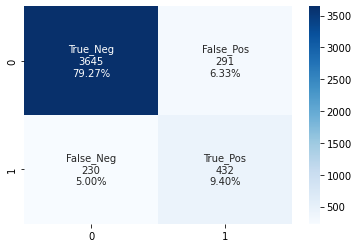

In [ ]:
cm=cmdt
group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3961
           1       0.64      0.70      0.66       637

    accuracy                           0.90      4598
   macro avg       0.79      0.82      0.80      4598
weighted avg       0.91      0.90      0.90      4598



In [ ]:
# Random Forest Classifier

In [ ]:
# instantiate the classifier with n_estimators = 100

from sklearn.ensemble import RandomForestClassifier

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
#prediction
y_pred_100 = rfc_100.predict(X_test)
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred_100))

Accuracy Score: 0.9319269247498913


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_100)
print(cm)

[[3905   56]
 [ 257  380]]


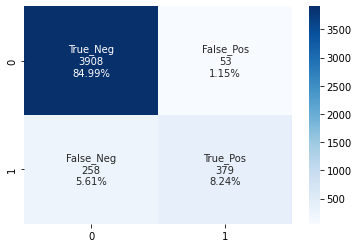

In [ ]:
group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3961
           1       0.87      0.60      0.71       637

    accuracy                           0.93      4598
   macro avg       0.90      0.79      0.83      4598
weighted avg       0.93      0.93      0.93      4598



In [ ]:
#logistic Regression Classifier

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test=y_test.to_numpy()


AttributeError: ignored

In [ ]:
y_test=y_test.reshape(-1, 1)

In [ ]:
y_pred_test = logreg.predict(X_test)

#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score: 0.8560243584167029


In [ ]:
from sklearn.metrics import confusion_matrix
cmlr = confusion_matrix(y_test, y_pred_test)
print(cmlr)

[[3936    0]
 [ 662    0]]


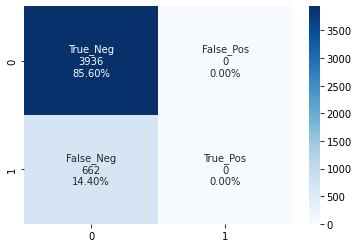

In [ ]:
cm=cmlr
group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      3936
           1       0.00      0.00      0.00       662

    accuracy                           0.86      4598
   macro avg       0.43      0.50      0.46      4598
weighted avg       0.73      0.86      0.79      4598

